# Exercise 2 - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [1]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


170500096/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* build and train the ***AlexNet*** CNN architecture from the lecture
* use 'relu' functions for the non-linear activation
* optimize the learning hyper-paramters to get the best  test accuracy

In [3]:
# AlexNet lecture _ Conv1 (maxnorm),2 (maxnorm),3,4,5(max) fc5 7 (full)
#Keras model architecture - sequential model, meaning the output of each layer 
#is passed directly into the next one
model_AlexNet = Sequential()

# convolutional (Faltung) layer - Die Filter Funktion. Musterverlgeich
# The arguments to the 
# Conv2D() function determine how many features will be extracted
# The first argument determines how many filters the layer will have. 32
# The second argument Initializers  - define the way to set the initial 
# random weights of Keras layers.
# The third argument to Conv2D() is where we provide 
# the dimensions of this window. 
# The padding argument determines how the window will be moved across the data.
# ensure the height and width of the output feature maps matches the inputs.
# 'same' layer output with same length
#  convolutional layers with small 3×3 filters followed by a max pooling layer.
# layers form a block, and these blocks can be repeated where the number of
# filters in each block is increased with the depth of the network 
# such as 32, 64, 128, 256 for the first four blocks of the model.
# 32 Filter and Window size 3,3
model_AlexNet.add(Conv2D(32, (3, 3), activation='relu', 
                         kernel_initializer='he_uniform', padding='same', 
                         input_shape=(32, 32, 3)))
model_AlexNet.add(Conv2D(32, (3, 3), activation='relu', 
                         kernel_initializer='he_uniform', padding='same'))
# MaxPool2D layer takes the output of the previous layer, and shrinks it down
# It does this by looking at a window of input data and then selecting the
# largest value in the window and propagating only that value to the output.
# Argument 2*2 Window, by default moves window so that it contains entirely new
# data
model_AlexNet.add(MaxPooling2D((2, 2)))
# The Dropout layer randomly sets some of a tensor’s values to zero during 
# training. In this case, by calling Dropout(0.1), we set 10% of the values 
# to zero, entirely obliterating that data. Dropout is a regularization 
# technique. Dropout is a simple but effective way to limit overfitting.
model_AlexNet.add(Dropout(0.1))

model_AlexNet.add(Conv2D(64, (3, 3), activation='relu',
                         kernel_initializer='he_uniform', padding='same'))
model_AlexNet.add(Conv2D(64, (3, 3), activation='relu',
                         kernel_initializer='he_uniform', padding='same'))
model_AlexNet.add(MaxPooling2D((2, 2)))
model_AlexNet.add(Dropout(0.1))

# because we now have high-level representations of the major features 
# contained within our input, we can “zoom out” and study them in aggregate. 
# To do so, we flatten our data and feed it into a Dense layer (also known 
# as a fully connected layer):

model_AlexNet.add(Flatten())
model_AlexNet.add(Dense(128, activation='relu', 
                        kernel_initializer='he_uniform'))

# The layer is configured with a "softmax" activation function, 
# which results in the layer’s output being a set of probabilities that sum to 1
model_AlexNet.add(Dense(num_classes, activation='softmax'))


In [6]:
from keras.optimizers import SGD
# modest learning rate of 0.001 and a large momentum of 0.9
# With a high learning rate, the weights and biases are adjusted more with each 
# iteration, meaning convergence happens fast. However, these big jumps mean 
# that it’s more difficult to get to the ideal values because we might 
# keep jumping past them.
# compile model
opt = SGD(lr=0.001, momentum=0.9)
# The metrics argument allows us to specify some additional functions that 
# are used to judge the performance of our model.
# Cross-entropy will calculate a score that summarizes the average difference 
# between the actual and predicted probability distributions for all 
# classes in the problem. The score is minimized and a perfect cross-entropy 
# value is 0.
model_AlexNet.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
model_AlexNet.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [9]:
# scale pixels
# convert from integers to floats
train_norm= x_train.astype('float32')
test_norm= x_test.astype('float32')
# normalize to range 
train_norm = train_norm/255.0
test_norm = test_norm/255.0 

In [10]:
history_AlexNet = model_AlexNet.fit(train_norm, y_train, epochs=epochs, batch_size=batch_size,  validation_data=(test_norm,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 275s 5ms/step - loss: 1.6449 - accuracy: 0.4051 - val_loss: 1.3769 - val_accuracy: 0.5115
Epoch 2/10
50000/50000 [==============================] - 274s 5ms/step - loss: 1.2705 - accuracy: 0.5448 - val_loss: 1.1766 - val_accuracy: 0.5796
Epoch 3/10
50000/50000 [==============================] - 274s 5ms/step - loss: 1.0978 - accuracy: 0.6125 - val_loss: 1.0223 - val_accuracy: 0.6309
Epoch 4/10
50000/50000 [==============================] - 275s 6ms/step - loss: 0.9762 - accuracy: 0.6554 - val_loss: 0.9535 - val_accuracy: 0.6644
Epoch 5/10
50000/50000 [==============================] - 275s 5ms/step - loss: 0.8935 - accuracy: 0.6868 - val_loss: 0.8830 - val_accuracy: 0.6889
Epoch 6/10
50000/50000 [==============================] - 274s 5ms/step - loss: 0.8257 - accuracy: 0.7101 - val_loss: 0.8297 - val_accuracy: 0.7108
Epoch 7/10
50000/50000 [==============================] - 273s

Text(0.5, 0, 'Epochs')

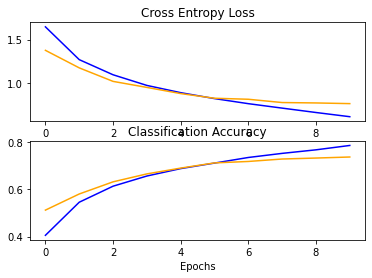

In [25]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_AlexNet.history['loss'], color='blue', label='train')
plt.plot(history_AlexNet.history['val_loss'], color='orange', label='test')
plt.xlabel('Epochs')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_AlexNet.history['accuracy'], color='blue', label='train')
plt.plot(history_AlexNet.history['val_accuracy'], color='orange', 
             label='test')
plt.xlabel('Epochs')

Knapp ab Epochs 5 tritt overfitting ein.
